# Pymaceuticals Inc.

## Analysis

1. Largest population of mice were kept on Capomulin regimen followed by Ramicane regimen as depicted in the bar chart.  Smalled population was on Propriva.
2. Summary statistics show that Capomulin and Remicane were found to be most effective since average tumor volume for both was lowest at approximately 40 mm3 and standard deviation of + or- approximately 5 units.  While other regimens yielded average tumor volume higher than 50 mm3.  Furthermore, the standard error for Capomulin and Ramicane was lowest versus other regimen, potentially due to higher test population.
3. As seen in pie plot, male versus female mice test population were about the same at ~ 50%.  Although not part of this exercise, the impact of mice sex on tumor volume was also explored. It was concluded, via line chart (not shown here), that both male and female mice tumor growth rates were similar (determined by plotting final tumor volume vs Timepoint for both male and female mice).  Therefore impact of mice sex upon its reaction to a treatment regimen is not significant. 
4. Box plot reconfirmed lower average tumor volume observation for Capomulin and Remicane that was seen in summary statistics.  Additionally only one  outlier seen for Infubinol shows that overall there is less variability in the data.  However, the outlier for Infubinol should be further investigated.
5. Line plot of final tumor volume over time for mouse S185 shows an inverse relationship where consistent reduction in tumor volume was observed over time when on Capomulin treatment regimen
6. Scatter plot of average tumor volume versus average mice weight shows a linear relationship with the weight of the mice.  So as the average mice weight increases, so does the average tumor volume
7.  When pearson correlation was calculated, as expected, it showed a strong positive value of 0.84 between mice weight and average tumor volume, indicating that the drugs were less effective on overweight mice (potentially due to poor absorption due to the presence of fatty issue).  
8.  A straright line equation depicting a linear regression fit, with a r-squared value of 0.71, was established for predicting approximate average tumor volume for an average mice weight.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_mouse_df["Mouse ID"].unique())

249

In [3]:
# rearrange the column sequence to match starter code

combined_mouse_new_df = combined_mouse_df.reindex(columns = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", 
                                    "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_mouse_new_df[combined_mouse_new_df.duplicated()]
duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
909,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_ID_data = combined_mouse_new_df.loc[combined_mouse_new_df['Mouse ID'] == "g989"]
duplicated_mouse_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_mouse_new_df.drop(duplicated_mouse_ID_data.index)

clean_mice_df.sort_values("Timepoint", ascending = True).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
1226,n678,0,45.0,0,Propriva,Male,5,29
1229,n763,0,45.0,0,Placebo,Female,16,25
341,v923,0,45.0,0,Capomulin,Female,19,21
338,w150,0,45.0,0,Capomulin,Male,23,23


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_df["Mouse ID"].unique())

248

## Summary Statistics 

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_mice_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume = clean_mice_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor_volume = clean_mice_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev_tumor_volume = clean_mice_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_err_tumor_volume = clean_mice_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stat_df = pd.DataFrame({"Tumor Volume Mean": mean_tumor_volume, "Tumor Volume Median": median_tumor_volume,
                               "Tumor Volume Variance": variance_tumor_volume, "Tumor Volume Std. Dev": std_dev_tumor_volume,
                               "Tumor Volume Std. Err.": std_err_tumor_volume})
summary_stat_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_mice_df.groupby("Drug Regimen").agg ({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

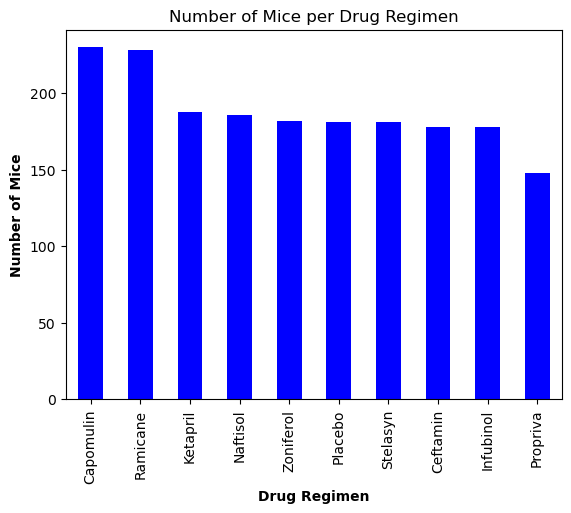

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_mice_per_regimen = clean_mice_df.groupby("Drug Regimen")['Mouse ID'].count()

pandas_bar_chart = number_mice_per_regimen.sort_values(ascending = False).plot(kind='bar', color = "b", width=0.5)

 #Set x/y label, title
pandas_bar_chart.set_title(label='Number of Mice per Drug Regimen')
pandas_bar_chart.set_xlabel('Drug Regimen', fontweight = 'bold')
pandas_bar_chart.set_ylabel('Number of Mice', fontweight = 'bold')


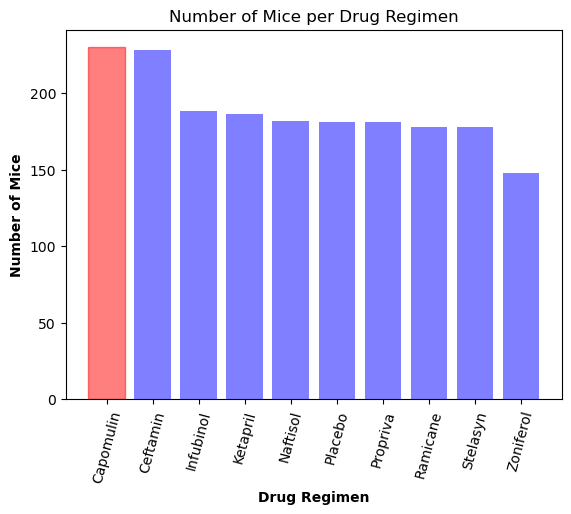

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

number_mice_per_regimen = clean_mice_df.groupby("Drug Regimen")['Mouse ID'].count()

# Generate a bar plot showing the total number of mice for each treatment 
# Set x axis
x_axis_regimen = np.arange(len(number_mice_per_regimen))
regimen_name = list(number_mice_per_regimen.index.values)

# plot bar chart
py_bar_mice_per_regimen = plt.bar(x_axis_regimen, number_mice_per_regimen.sort_values(ascending = False), color="b", alpha=0.5, width=0.8)

#highlight high value data points in red
py_bar_mice_per_regimen[0].set_color('red') 



# Set x/y label, title
plt.xticks(x_axis_regimen, regimen_name, rotation= 75)
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen', fontweight = 'bold')
plt.ylabel('Number of Mice', fontweight = 'bold')
plt.show()


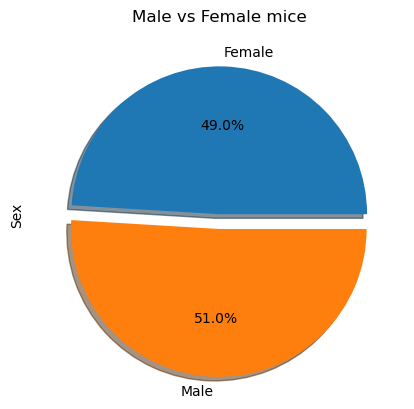

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_mice_df.groupby("Sex")['Sex'].count()
panda_mice_sex = mice_sex.plot(kind = "pie", title ='Male vs Female mice', legend= False, 
                               autopct='%1.1f%%', explode=(0,0.1), shadow = True, startangle = 0)



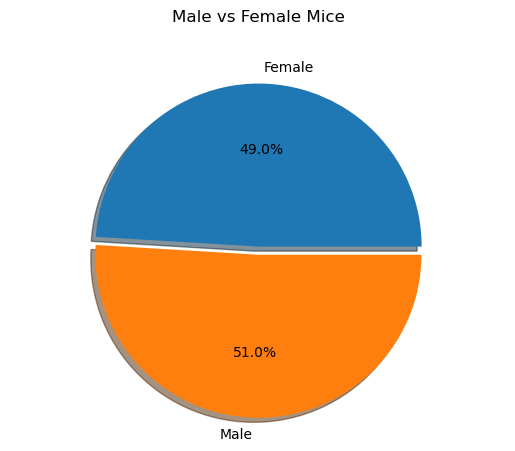

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_mice_df.groupby("Sex")['Sex'].count()
plt_mice_sex = plt.pie(mice_sex, labels = ["Female", "Male"], autopct="%1.1f%%",  startangle = 0, explode=(0,0.05), shadow = True )

plt.title("Male vs Female Mice", pad ='32')
plt.axis('equal')
plt.show()



## Outliers, Quartiles and Boxplot

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_timepoint_df = clean_mice_df.groupby(["Mouse ID", "Drug Regimen"]).last()["Timepoint"]  
                                                                                
final_timepoint_df                                                                               

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

new_clean_mouse_df = pd.merge(final_timepoint_df, clean_mice_df, how='inner', on= ["Mouse ID",'Timepoint'])
new_clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
# set up a new list "regimen" for calling in the for loop

regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

final_tumor_volume_data = []

#set up a for loop to lookup four treatment options and corresponding tumor volume
for treatment in regimen:

    final_tumor_volume = new_clean_mouse_df.loc[new_clean_mouse_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    mean = final_tumor_volume.mean()
    iqr = upper_q-lower_q 
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    
 # Calculate outliers    
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    
    # add subset 
    final_tumor_volume_data.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    
    print('*************')
    print(f"{treatment} Regimen")
    print(f"Final tumor volume(mm3) for {treatment} below {round(lower_bound,2)} could be an outlier")
    print(f"Final tumor volume(mm3) for {treatment} above {round(upper_bound,2)} could be an outlier")
    print(f"Average tumor volume(mm3) for {treatment} is: {round(mean,2)}")
    print(f"Number of outliers for {treatment} is: {outliers.count()}")
    
    if outliers.count() > 0:
        for O in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[O], 2)}')
    
    


*************
Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be an outlier
Final tumor volume(mm3) for Capomulin above 51.83 could be an outlier
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
*************
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be an outlier
Final tumor volume(mm3) for Ramicane above 54.31 could be an outlier
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Ramicane is: 0
*************
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be an outlier
Final tumor volume(mm3) for Infubinol above 82.74 could be an outlier
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
*************
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 could be an outlier
Final tumor volume(mm3) for Ceftamin above 87.67 could be an outlier
Average tumor

Text(0, 0.5, 'Final Tumor Volume (mm3)')

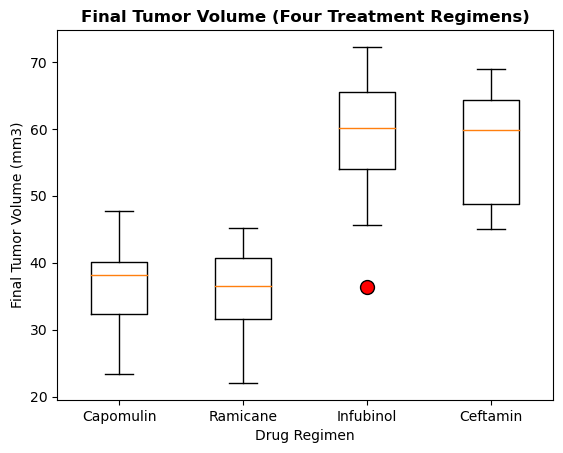

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_volume_data, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})
# Set X and Y label, title
final_tumor_plot.set_title('Final Tumor Volume (Four Treatment Regimens)', fontweight = 'bold')
final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')



## Line and Scatter Plot

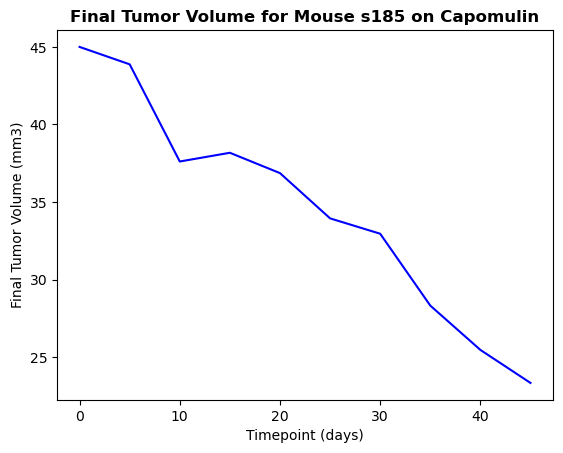

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# create data frame for Capomulin

Capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]
mouse_s185_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185"]
Y_axis = mouse_s185_df["Tumor Volume (mm3)"]
X_axis = mouse_s185_df["Timepoint"]
XY_Plot = plt.plot (X_axis,Y_axis, color = "blue")
# Set X and Y label, title
plt.title('Final Tumor Volume for Mouse s185 on Capomulin', fontweight = 'bold')
plt.xlabel('Timepoint (days)')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()


Text(0, 0.5, 'Average Tumor Volume')

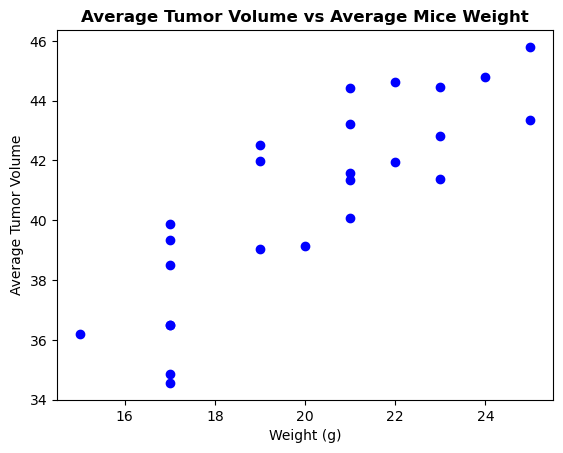

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] =="Capomulin"]
Capomulin_average_tumor_volume = Capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"] 
mouse_weight_df = Capomulin_df.groupby(["Mouse ID"]).mean()["Weight (g)"] 

Y_axis = Capomulin_average_tumor_volume
X_axis = mouse_weight_df
XY_Plot = plt.scatter (X_axis,Y_axis, color = "blue")
# Set X and Y label, title
plt.title('Average Tumor Volume vs Average Mice Weight', fontweight = 'bold')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')


## Correlation and Regression

The correlation between average mouse weight and average tumor vol is 0.84
y = 0.95x + 21.55
The r-squared is: 0.71


Text(20, 36, 'r-squared = 0.71')

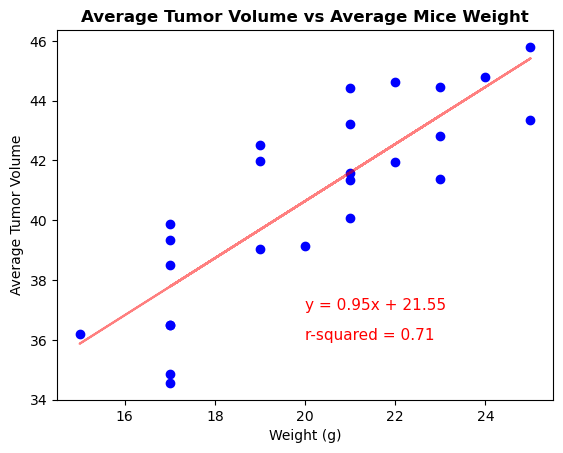

In [19]:
# Calculate the correlation coefficient and linear regression model 
# Correlation
Y_axis = Capomulin_average_tumor_volume
X_axis = mouse_weight_df

correlation = round(st.pearsonr(X_axis, Y_axis)[0],2)
print(f"The correlation between average mouse weight and average tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
# y = mx + b
regress_values = X_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

XY_Plot = plt.scatter (X_axis,Y_axis, color = "blue")
plt.plot(X_axis,regress_values, color='r', alpha=0.5)
# Set X and Y label, title
plt.title('Average Tumor Volume vs Average Mice Weight', fontweight = 'bold')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")


# Add line Annotation and r-squared to the graph 
plt.annotate(line_equation,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")


